# Finetuned Model Testing

This notebook tests our finetuned model from Hugging Face across different recipe categories:
1. Simple recipes
2. High GI recipes
3. Low GI recipes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from agents.gi_agent_roberta_finetuned import GIAnalysisAgentRoBERTaFinetuned
from agents.gi_agent_roberta_finetuned_2 import GIAnalysisAgentRoBERTaFinetuned2
from agents.gi_grader_agent import GIGraderAgent
from test_data.simple.simple_recipes import SIMPLE_RECIPES
from test_data.high_gi.high_gi_recipes import HIGH_GI_RECIPES
from test_data.low_gi.low_gi_recipes import LOW_GI_RECIPES
import json
from typing import List, Dict, Any
from datetime import datetime
import os

## Setup Results Directory

In [2]:
# Create timestamp for this test run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
results_dir = f'test_results/finetuned/{timestamp}'
plots_dir = f'{results_dir}/plots'
data_dir = f'{results_dir}/data'

# Create directories if they don't exist
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)

print(f"Results will be saved in: {results_dir}")

Results will be saved in: test_results/finetuned/20250601_104949


## Initialize Agents

In [3]:
# Initialize agents
gi_agent = GIAnalysisAgentRoBERTaFinetuned2()
grader_agent = GIGraderAgent()

Successfully loaded food data with 5000 entries


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


## Test Function

In [4]:
def test_category(recipes: List[Dict[str, Any]], category_name: str) -> pd.DataFrame:
    """Test a category of recipes and return results"""
    results = []
    
    for recipe in recipes:
        # Get our prediction
        our_result = gi_agent.process([recipe])
        if 'error' in our_result:
            print(f"Error processing {recipe['title']}: {our_result['error']}")
            continue
            
        our_prediction = our_result['glycemic_load']
        
        # Get expert grading
        grade_result = grader_agent.grade_prediction(recipe, our_prediction)
        
        # Store results
        results.append({
            'recipe': recipe['title'],
            'category': category_name,
            'our_prediction': our_prediction,
            'expert_assessment': grade_result['assessed_gi'],
            'prediction_difference': grade_result['prediction_difference']
        })
    
    return pd.DataFrame(results)

## Run Tests and Calculate Metrics

In [5]:
simple_results = test_category(SIMPLE_RECIPES[:1], "Simple")
simple_results

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: brown rice
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 77.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 184.8
Debug - Ingredient Load: 33.264

Debug - Ingredient: steamed vegetables
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 5.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 12.0
Debug - Ingredient Load: 2.16

Debug - Ingredient: olive oil
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 1 tbsp
Debug - Converted Quantity (g): 15.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: soy sauce
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 5.0
Debug - Original Quantity: 1 tsp
Debug - Converted Quantity (g): 5.0
Debug - Actual Carbs (g): 0.25
Debug - Ingredient Load: 0.045

Debug - Total Glycemic Load: 35.46900000000001

Initial glycemic load for Basic Brown Rice Bowl: 35.46900000000001
Added 20 for high GI ingredients in: Basic Brown Rice Bowl
Glycemic load after high GI adjustment: 55.46900000000001
Final glycemic load after all adjustments: 55.46900000000001


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"


,recipe,category,our_prediction,expert_assessment,prediction_difference
0,Basic Brown Rice Bowl,Simple,55.469,50.0,5.469


In [6]:
# Test each category
simple_results = test_category(SIMPLE_RECIPES, "Simple")
low_gi_results = test_category(LOW_GI_RECIPES, "Low GI")
high_gi_results = test_category(HIGH_GI_RECIPES, "High GI")

# Combine results
all_results = pd.concat([simple_results, high_gi_results, low_gi_results])

# Calculate RMSE for each recipe
all_results['rmse'] = all_results['prediction_difference'] ** 2

# Display results
all_results

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: brown rice
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 77.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 184.8
Debug - Ingredient Load: 33.264

Debug - Ingredient: steamed vegetables
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 5.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 12.0
Debug - Ingredient Load: 2.16

Debug - Ingredient: olive oil
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 1 tbsp
Debug - Converted Quantity (g): 15.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: soy sauce
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 5.7
Debug - Original Quantity: 1 tsp
Debug - Converted Quantity (g): 5.0
Debug - Actual Carbs (g): 0.285
Debug - Ingredient Load: 0.0513

Debug - Total Glycemic Load: 35.475300000000004

Initial glycemic load for Basic Brown Rice Bowl: 35.475300000000004
Added 20 for high GI ingredients in: Basic Brown Rice Bowl
Glycemic load after high GI adjustment: 55.475300000000004
Final glycemic load after all adjustments: 55.475300000000004


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: red lentils
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 60.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 144.0
Debug - Ingredient Load: 25.92

Debug - Ingredient: onion
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 9.0
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.09
Debug - Ingredient Load: 0.0162

Debug - Ingredient: carrots
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 9.0
Debug - Original Quantity: 2 
Debug - Converted Quantity (g): 2.0
Debug - Actual Carbs (g): 0.18
Debug - Ingredient Load: 0.0324

Debug - Ingredient: vegetable broth
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 1.0
Debug - Original Quantity: 4 cups
Debug - Converted Quantity (g): 960.0
Debug - Actual Carbs (g): 9.6
Debug - Ingredient Load: 1.7279999999999998

Debug - Ingredient: cumin
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 44.0
Debug - Original Quantity: 1 tsp
Debug - Converted Quantity (g): 5.0
Debug - Actual Carbs (g): 2.2
Debug - Ingredient Load: 0.396

Debug - Total Glycemic Load: 28.092600000000004

Initial glycemic load for Simple Lentil Soup: 28.092600000000004
Final glycemic load after all adjustments: 28.092600000000004


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: quinoa
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 21.3
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 51.12
Debug - Ingredient Load: 9.2016

Debug - Ingredient: cucumber
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 4.0
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.04
Debug - Ingredient Load: 0.0072

Debug - Ingredient: tomatoes
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 3.9
Debug - Original Quantity: 2 
Debug - Converted Quantity (g): 2.0
Debug - Actual Carbs (g): 0.078
Debug - Ingredient Load: 0.014039999999999999

Debug - Ingredient: olive oil
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: lemon
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 6.1
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.061
Debug - Ingredient Load: 0.010979999999999998

Debug - Total Glycemic Load: 9.233819999999998

Initial glycemic load for Basic Quinoa Salad: 9.233819999999998
Added 20 for high GI ingredients in: Basic Quinoa Salad
Glycemic load after high GI adjustment: 29.233819999999998
Final glycemic load after all adjustments: 29.233819999999998


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: firm tofu
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 1.9
Debug - Original Quantity: 200 g
Debug - Converted Quantity (g): 200.0
Debug - Actual Carbs (g): 3.8
Debug - Ingredient Load: 0.6839999999999999

Debug - Ingredient: mixed vegetables
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 7.0
Debug - Original Quantity: 2 cups
Debug - Converted Quantity (g): 480.0
Debug - Actual Carbs (g): 33.6
Debug - Ingredient Load: 6.048000000000001

Debug - Ingredient: soy sauce
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 5.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 1.5
Debug - Ingredient Load: 0.27

Debug - Ingredient: brown rice
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 77.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 184.8
Debug - Ingredient Load: 33.264

Debug - Total Glycemic Load: 40.266000000000005

Initial glycemic load for Simple Tofu Stir Fry: 40.266000000000005
Final glycemic load after all adjustments: 40.266000000000005


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: black beans
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 27.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 64.8
Debug - Ingredient Load: 11.663999999999998

Debug - Ingredient: brown rice
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 77.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 184.8
Debug - Ingredient Load: 33.264

Debug - Ingredient: avocado
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 8.5
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.085
Debug - Ingredient Load: 0.015300000000000001

Debug - Ingredient: lime juice
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 6.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 1.8
Debug - Ingredient Load: 0.324

Debug - Total Glycemic Load: 45.2673

Initial glycemic load for Basic Bean Bowl: 45.2673
Final glycemic load after all adjustments: 45.2673


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: mixed greens
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 3.0
Debug - Original Quantity: 2 cups
Debug - Converted Quantity (g): 480.0
Debug - Actual Carbs (g): 14.4
Debug - Ingredient Load: 2.592

Debug - Ingredient: cucumber
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 4.0
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.04
Debug - Ingredient Load: 0.0072

Debug - Ingredient: tomatoes
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 3.9
Debug - Original Quantity: 2 
Debug - Converted Quantity (g): 2.0
Debug - Actual Carbs (g): 0.078
Debug - Ingredient Load: 0.014039999999999999

Debug - Ingredient: olives
Debug - GI Value: 14.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 6.0
Debug - Original Quantity: 1/4 cup
Debug - Converted Quantity (g): 60.0
Debug - Actual Carbs (g): 3.6
Debug - Ingredient Load: 0.504

Debug - Ingredient: feta cheese
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 4.0
Debug - Original Quantity: 100 g
Debug - Converted Quantity (g): 100.0
Debug - Actual Carbs (g): 4.0
Debug - Ingredient Load: 0.72

Debug - Ingredient: olive oil
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: lemon
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 6.1
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.061
Debug - Ingredient Load: 0.010979999999999998

Debug - Total Glycemic Load: 3.8482200000000004

Initial glycemic load for Mediterranean Salad: 3.8482200000000004
Final glycemic load after all adjustments: 3.8482200000000004


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: salmon fillet
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 200 g
Debug - Converted Quantity (g): 200.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: mixed vegetables
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 7.0
Debug - Original Quantity: 2 cups
Debug - Converted Quantity (g): 480.0
Debug - Actual Carbs (g): 33.6
Debug - Ingredient Load: 6.048000000000001

Debug - Ingredient: olive oil
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: lemon
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 6.1
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.061
Debug - Ingredient Load: 0.010979999999999998

Debug - Ingredient: herbs
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 5.0
Debug - Original Quantity: 1 tsp
Debug - Converted Quantity (g): 5.0
Debug - Actual Carbs (g): 0.25
Debug - Ingredient Load: 0.045

Debug - Total Glycemic Load: 6.103980000000001

Initial glycemic load for Grilled Salmon with Vegetables: 6.103980000000001
Final glycemic load after all adjustments: 6.103980000000001


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: green lentils
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 20.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 48.0
Debug - Ingredient Load: 8.64

Debug - Ingredient: fresh spinach
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 1.1
Debug - Original Quantity: 2 cups
Debug - Converted Quantity (g): 480.0
Debug - Actual Carbs (g): 5.28
Debug - Ingredient Load: 0.9504

Debug - Ingredient: tomato
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 3.9
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.039
Debug - Ingredient Load: 0.007019999999999999

Debug - Ingredient: onion
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 9.0
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.09
Debug - Ingredient Load: 0.0162

Debug - Ingredient: garlic
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 33.0
Debug - Original Quantity: 2 cloves
Debug - Converted Quantity (g): 2.0
Debug - Actual Carbs (g): 0.66
Debug - Ingredient Load: 0.1188

Debug - Ingredient: olive oil
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 1 tbsp
Debug - Converted Quantity (g): 15.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: cumin seeds
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 44.0
Debug - Original Quantity: 1 tsp
Debug - Converted Quantity (g): 5.0
Debug - Actual Carbs (g): 2.2
Debug - Ingredient Load: 0.396

Debug - Ingredient: ground turmeric
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 65.0
Debug - Original Quantity: 1/2 tsp
Debug - Converted Quantity (g): 2.5
Debug - Actual Carbs (g): 1.625
Debug - Ingredient Load: 0.2925

Debug - Ingredient: ground coriander
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 55.0
Debug - Original Quantity: 1/2 tsp
Debug - Converted Quantity (g): 2.5
Debug - Actual Carbs (g): 1.375
Debug - Ingredient Load: 0.2475

Debug - Total Glycemic Load: 10.668420000000003

Initial glycemic load for Lentil and Spinach Curry: 10.668420000000003
Final glycemic load after all adjustments: 10.668420000000003


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: Greek yogurt
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 4.0
Debug - Original Quantity: 2 cups
Debug - Converted Quantity (g): 480.0
Debug - Actual Carbs (g): 19.2
Debug - Ingredient Load: 3.4559999999999995

Debug - Ingredient: nuts
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 30.0
Debug - Original Quantity: 1/4 cup
Debug - Converted Quantity (g): 60.0
Debug - Actual Carbs (g): 18.0
Debug - Ingredient Load: 3.24

Debug - Ingredient: berries
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 10.0
Debug - Original Quantity: 1/4 cup
Debug - Converted Quantity (g): 60.0
Debug - Actual Carbs (g): 6.0
Debug - Ingredient Load: 1.08

Debug - Ingredient: honey
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 82.0
Debug - Original Quantity: 1 tbsp
Debug - Converted Quantity (g): 15.0
Debug - Actual Carbs (g): 12.3
Debug - Ingredient Load: 2.214

Debug - Total Glycemic Load: 9.99

Initial glycemic load for Greek Yogurt Parfait: 9.99
Final glycemic load after all adjustments: 9.99


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: whole grain bread
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 40.0
Debug - Original Quantity: 2 slices
Debug - Converted Quantity (g): 2.0
Debug - Actual Carbs (g): 0.8
Debug - Ingredient Load: 0.14400000000000002

Debug - Ingredient: avocado
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 8.5
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.085
Debug - Ingredient Load: 0.015300000000000001

Debug - Ingredient: eggs
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 2 
Debug - Converted Quantity (g): 2.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: olive oil
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 1 tbsp
Debug - Converted Quantity (g): 15.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: herbs
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 1 tsp
Debug - Converted Quantity (g): 5.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Total Glycemic Load: 0.15930000000000002

Initial glycemic load for Avocado and Egg Toast: 0.15930000000000002
Added 40 for high GI ingredients with low initial load in: Avocado and Egg Toast
Glycemic load after high GI adjustment: 40.1593
Final glycemic load after all adjustments: 40.1593


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: white rice
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 80.0
Debug - Original Quantity: 2 cups
Debug - Converted Quantity (g): 480.0
Debug - Actual Carbs (g): 384.0
Debug - Ingredient Load: 69.12

Debug - Ingredient: sweet potato
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 20.0
Debug - Original Quantity: 1 large
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.2
Debug - Ingredient Load: 0.036000000000000004

Debug - Ingredient: honey
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 82.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 24.6
Debug - Ingredient Load: 4.428

Debug - Ingredient: butter
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 1 tbsp
Debug - Converted Quantity (g): 15.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Total Glycemic Load: 73.584

Initial glycemic load for White Rice and Sweet Potato Bowl: 73.584
Glycemic load after high GI adjustment: 73.584
Final glycemic load after all adjustments: 73.584


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: white pasta
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 75.0
Debug - Original Quantity: 200 g
Debug - Converted Quantity (g): 200.0
Debug - Actual Carbs (g): 150.0
Debug - Ingredient Load: 27.0

Debug - Ingredient: white flour
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 76.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 182.4
Debug - Ingredient Load: 32.832

Debug - Ingredient: milk
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 5.0
Debug - Original Quantity: 2 cups
Debug - Converted Quantity (g): 480.0
Debug - Actual Carbs (g): 24.0
Debug - Ingredient Load: 4.32

Debug - Ingredient: butter
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: parmesan cheese
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 1/4 cup
Debug - Converted Quantity (g): 60.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Total Glycemic Load: 64.152

Initial glycemic load for Pasta with White Sauce: 64.152
Glycemic load after high GI adjustment: 64.152
Final glycemic load after all adjustments: 64.152


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: potatoes
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 17.0
Debug - Original Quantity: 4 large
Debug - Converted Quantity (g): 4.0
Debug - Actual Carbs (g): 0.68
Debug - Ingredient Load: 0.12240000000000001

Debug - Ingredient: butter
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 1/4 cup
Debug - Converted Quantity (g): 60.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: milk
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 5.0
Debug - Original Quantity: 1/2 cup
Debug - Converted Quantity (g): 120.0
Debug - Actual Carbs (g): 6.0
Debug - Ingredient Load: 1.08

Debug - Ingredient: white flour
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 76.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 22.8
Debug - Ingredient Load: 4.104

Debug - Ingredient: beef broth
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Total Glycemic Load: 5.3064

Initial glycemic load for Mashed Potatoes with Gravy: 5.3064
Added 40 for high GI ingredients with low initial load in: Mashed Potatoes with Gravy
Glycemic load after high GI adjustment: 45.3064
Final glycemic load after all adjustments: 45.3064


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: white bread
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 49.0
Debug - Original Quantity: 4 slices
Debug - Converted Quantity (g): 4.0
Debug - Actual Carbs (g): 1.96
Debug - Ingredient Load: 0.3528

Debug - Ingredient: mayonnaise
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Ingredient: processed cheese
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 1.0
Debug - Original Quantity: 2 slices
Debug - Converted Quantity (g): 2.0
Debug - Actual Carbs (g): 0.02
Debug - Ingredient Load: 0.0036

Debug - Ingredient: deli meat
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 0.0
Debug - Original Quantity: 2 slices
Debug - Converted Quantity (g): 2.0
Debug - Actual Carbs (g): 0.0
Debug - Ingredient Load: 0.0

Debug - Total Glycemic Load: 0.3564

Initial glycemic load for White Bread Sandwich: 0.3564
Added 40 for high GI ingredients with low initial load in: White Bread Sandwich
Glycemic load after high GI adjustment: 40.3564
Final glycemic load after all adjustments: 40.3564


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Debug - Ingredient: corn flakes
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 84.0
Debug - Original Quantity: 2 cups
Debug - Converted Quantity (g): 480.0
Debug - Actual Carbs (g): 403.2
Debug - Ingredient Load: 72.576

Debug - Ingredient: whole milk
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 5.0
Debug - Original Quantity: 1 cup
Debug - Converted Quantity (g): 240.0
Debug - Actual Carbs (g): 12.0
Debug - Ingredient Load: 2.16

Debug - Ingredient: sugar
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 100.0
Debug - Original Quantity: 2 tbsp
Debug - Converted Quantity (g): 30.0
Debug - Actual Carbs (g): 30.0
Debug - Ingredient Load: 5.4

Debug - Ingredient: banana
Debug - GI Value: 18.0


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Debug - Carb Content: 23.0
Debug - Original Quantity: 1 
Debug - Converted Quantity (g): 1.0
Debug - Actual Carbs (g): 0.23
Debug - Ingredient Load: 0.041400000000000006

Debug - Total Glycemic Load: 80.17739999999999

Initial glycemic load for Breakfast Cereal Bowl: 80.17739999999999
Applied 10% reduction for load > 80: 80.17739999999999 -> 72.15965999999999
Final glycemic load after all adjustments: 72.15965999999999


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"


,recipe,category,our_prediction,expert_assessment,prediction_difference,rmse
0,Basic Brown Rice Bowl,Simple,55.47530,52.50,2.97530,8.852410
1,Simple Lentil Soup,Simple,28.09260,29.00,0.90740,0.823375
2,Basic Quinoa Salad,Simple,29.23382,44.00,14.76618,218.040072
3,Simple Tofu Stir Fry,Simple,40.26600,45.00,4.73400,22.410756
4,Basic Bean Bowl,Simple,45.26730,45.00,0.26730,0.071449
0,White Rice and Sweet Potato Bowl,High GI,73.58400,64.00,9.58400,91.853056
1,Pasta with White Sauce,High GI,64.15200,65.00,0.84800,0.719104
2,Mashed Potatoes with Gravy,High GI,45.30640,66.50,21.19360,449.168681
3,White Bread Sandwich,High GI,40.35640,72.50,32.14360,1033.211021
4,Breakfast Cereal Bowl,High GI,72.15966,68.00,4.15966,17.302771


## Visualize Results

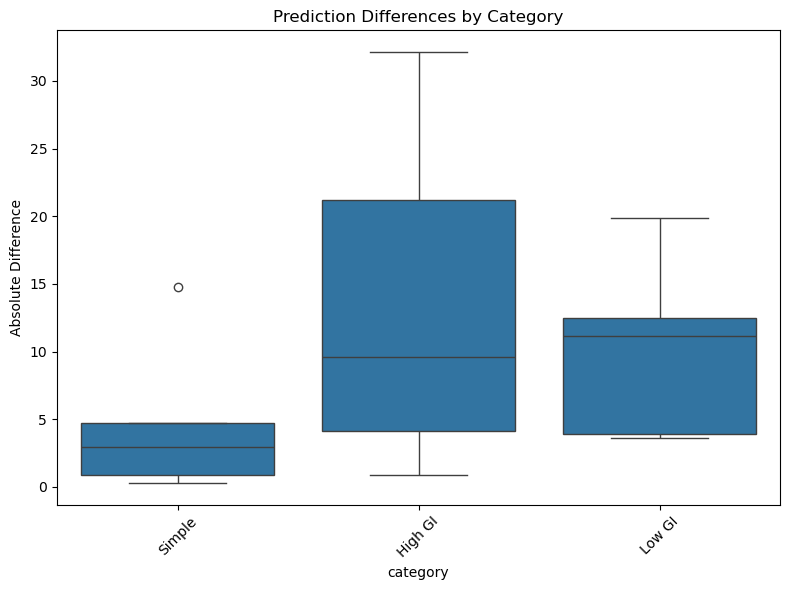

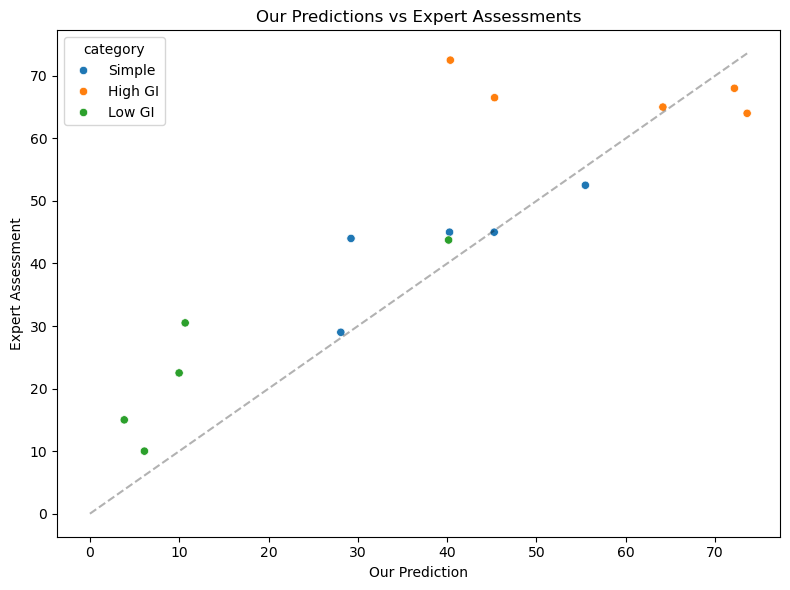

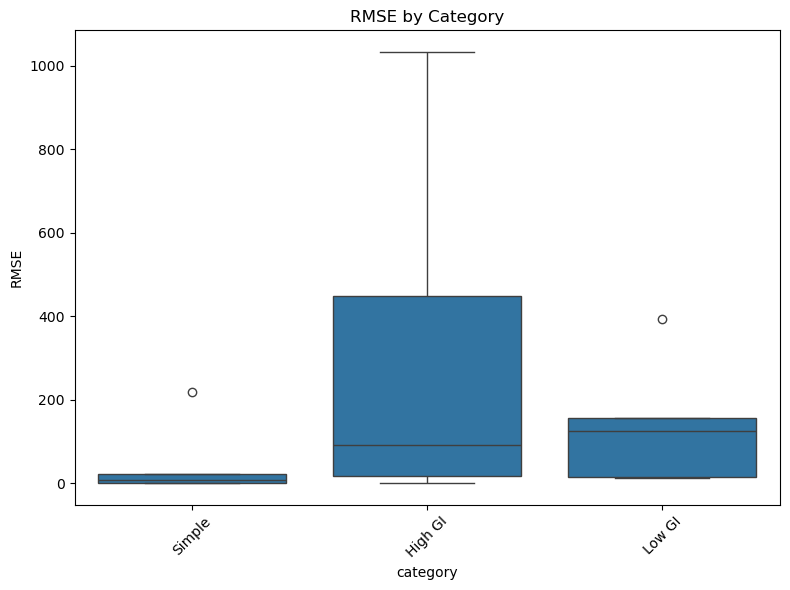

In [7]:
# --- Plot 1: Box plot of prediction differences by category ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='prediction_difference', data=all_results)
plt.title('Prediction Differences by Category')
plt.xticks(rotation=45)
plt.ylabel('Absolute Difference')
plt.tight_layout()
plt.savefig(f'{plots_dir}/box_plot_prediction_difference.png')
plt.show()

# --- Plot 2: Scatter plot of predictions vs expert assessments ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=all_results, x='our_prediction', y='expert_assessment', hue='category')
max_val = max(all_results['our_prediction'].max(), all_results['expert_assessment'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.3)  # Diagonal line
plt.title('Our Predictions vs Expert Assessments')
plt.xlabel('Our Prediction')
plt.ylabel('Expert Assessment')
plt.tight_layout()
plt.savefig(f'{plots_dir}/scatter_plot_predictions_vs_experts.png')
plt.show()

# --- Plot 3: Box plot of RMSE by category ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='rmse', data=all_results)
plt.title('RMSE by Category')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.tight_layout()
plt.savefig(f'{plots_dir}/box_plot_rmse.png')
plt.show()

## Analysis

In [8]:
print("\nOverall Statistics:")
print("=================")
print(f"Total recipes tested: {len(all_results)}")
print(f"Mean prediction difference: {all_results['prediction_difference'].mean():.2f}")
print(f"Root Mean Square Error (RMSE): {np.sqrt(all_results['rmse'].mean()):.2f}")
print(f"Standard deviation: {all_results['prediction_difference'].std():.2f}")
print(f"Max difference: {all_results['prediction_difference'].max():.2f}")
print(f"Min difference: {all_results['prediction_difference'].min():.2f}")

print("\nCategory-wise Statistics:")
print("======================")
for category in ['Simple', 'High GI', 'Low GI']:
    cat_results = all_results[all_results['category'] == category]
    print(f"\n{category}:")
    print(f"Number of recipes: {len(cat_results)}")
    print(f"Mean difference: {cat_results['prediction_difference'].mean():.2f}")
    print(f"RMSE: {np.sqrt(cat_results['rmse'].mean()):.2f}")
    print(f"Standard deviation: {cat_results['prediction_difference'].std():.2f}")


Overall Statistics:
Total recipes tested: 15
Mean prediction difference: 9.50
Root Mean Square Error (RMSE): 13.02
Standard deviation: 9.22
Max difference: 32.14
Min difference: 0.27

Category-wise Statistics:

Simple:
Number of recipes: 5
Mean difference: 4.73
RMSE: 7.07
Standard deviation: 5.88

High GI:
Number of recipes: 5
Mean difference: 13.59
RMSE: 17.85
Standard deviation: 12.94

Low GI:
Number of recipes: 5
Mean difference: 10.20
RMSE: 11.85
Standard deviation: 6.75


## Export Results

In [9]:
# Save detailed results to CSV
all_results.to_csv(f'{data_dir}/finetuned_model_results.csv', index=False)

# Save summary statistics
summary_stats = {
    'overall': {
        'total_recipes': len(all_results),
        'mean_difference': all_results['prediction_difference'].mean(),
        'rmse': np.sqrt(all_results['rmse'].mean()),
        'std_difference': all_results['prediction_difference'].std(),
        'max_difference': all_results['prediction_difference'].max(),
        'min_difference': all_results['prediction_difference'].min()
    },
    'by_category': {
        category: {
            'count': len(all_results[all_results['category'] == category]),
            'mean_difference': all_results[all_results['category'] == category]['prediction_difference'].mean(),
            'rmse': np.sqrt(all_results[all_results['category'] == category]['rmse'].mean()),
            'std_difference': all_results[all_results['category'] == category]['prediction_difference'].std()
        }
        for category in ['Simple', 'High GI', 'Low GI']
    }
}

with open(f'{data_dir}/summary_stats.json', 'w') as f:
    json.dump(summary_stats, f, indent=4)

print(f"\nResults have been saved to {results_dir}")


Results have been saved to test_results/finetuned/20250601_104949
